# Results Evaluation

In [1]:
%run ../scripts/load_df_for_analysis.py

In [2]:
%run ../scripts/data_visualisations.py

In [3]:
%run ../scripts/df_calculations.py

In [4]:
%run ../scripts/significance_tests.py

## Overall model results

### Comparison of best GPT and best Llama Model (from tested models on this data): <br>GPT 4.1 vs. Llama 3.1:70b

In [5]:
chunking = "1024_20"
only_text = True
model = "gpt-4.1-2025-04-14"
df_gpt = load_df_for_analysis(chunking, only_text, model)
results_gpt = eval_predictions(df_gpt, include_relabelled_partially=True)
results_gpt_no_partially = eval_predictions(df_gpt, include_relabelled_partially=False)

In [6]:
chunking = "256_20"
only_text = True
model = "llama3.1.70b"
df_llama = load_df_for_analysis(chunking, only_text, model)
results_llama = eval_predictions(df_llama, include_relabelled_partially=True)
results_llama_no_partially = eval_predictions(df_llama, include_relabelled_partially=False)

In [7]:
model_results = {
    "GPT-4.1 (1024 token chunks)": results_gpt,
    "Llama 3.1:70b (256 token chunks)": results_llama,
}

model_results_no_partially = {
    "GPT-4.1 (1024 token chunks)": results_gpt_no_partially,
    "Llama 3.1:70b (256 token chunks)": results_llama_no_partially
}

display_model_results_table(model_results)
display_model_results_table(model_results_no_partially)

,Balanced Accuracy,Precision (Unsubstantiated),Recall (Unsubstantiated),F1 Score (Unsubstantiated),Precision (Substantiated),Recall (Substantiated),F1 Score (Substantiated)
Model,,,,,,,
GPT-4.1 (1024 token chunks),0.856,0.877,0.809,0.842,0.844,0.902,0.872
Llama 3.1:70b (256 token chunks),0.810,0.748,0.878,0.808,0.875,0.742,0.803


,Balanced Accuracy,Precision (Unsubstantiated),Recall (Unsubstantiated),F1 Score (Unsubstantiated),Precision (Substantiated),Recall (Substantiated),F1 Score (Substantiated)
Model,,,,,,,
GPT-4.1 (1024 token chunks),0.873,0.890,0.832,0.860,0.865,0.913,0.888
Llama 3.1:70b (256 token chunks),0.836,0.756,0.925,0.832,0.922,0.746,0.825


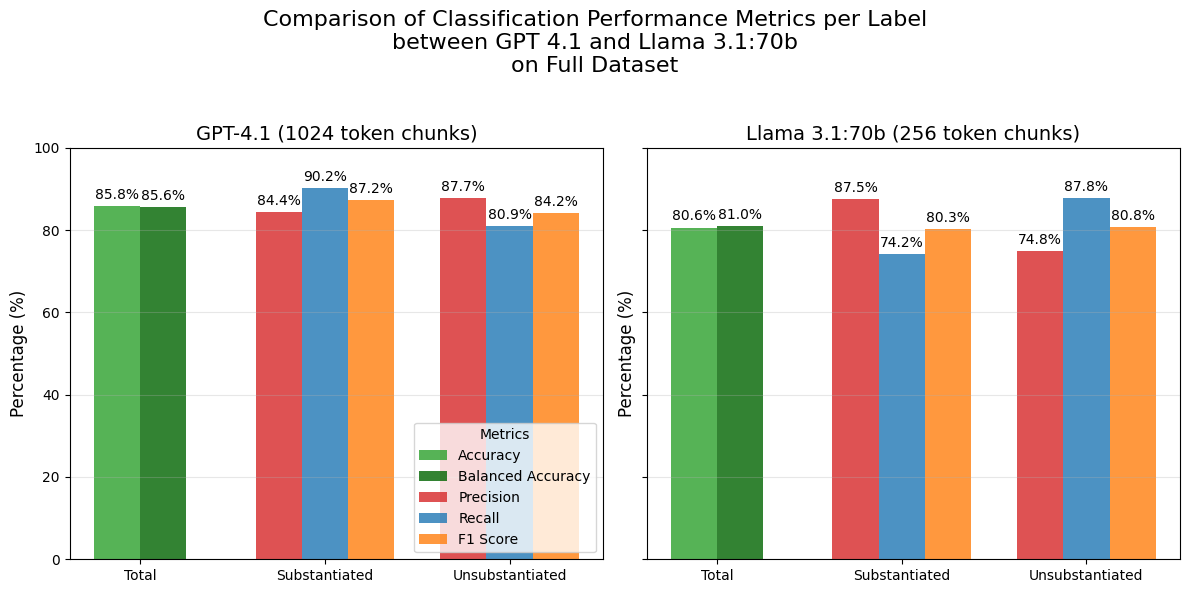

In [8]:
show_metrics_per_label(model_results, "Comparison of Classification Performance Metrics per Label\nbetween GPT 4.1 and Llama 3.1:70b\non Full Dataset")

## Comparison: Evaluation per Annotation Attribute

In [9]:
def attribute_predictions_per_model(model_dfs, attribute, relabelled_partially=False, group_numbers_from=False):
    results = {}
    for model_name, df in model_dfs.items():
        results[model_name] = eval_predictions_per_attribute_value(df, attribute, include_relabelled_partially=True, group_numbers_from=group_numbers_from)
        if relabelled_partially:
            results[model_name + " (exclude relabelled partially)"] = eval_predictions_per_attribute_value(df, attribute, include_relabelled_partially=False, group_numbers_from=group_numbers_from)
    return results

In [10]:
def fisher_exact_for_attribute(df, attribute, group_numbers_from=False):
    results = {}
    attribute_groups = get_attribute_value_groups(df, attribute, group_numbers_from)
    for group_name, attribute_values_list in attribute_groups:
        results[group_name] = calc_fisher_exact_total_sub_unsub(
            eval_attribute_subset_vs_rest(df, attribute, attribute_values_list)
        )
    display_fishers_exact_test_results(results)
    return results

In [11]:
def chi_squared_for_attribute(df, attribute, group_numbers_from=False):
    attribute_groups = get_attribute_value_groups(df, attribute, group_numbers_from)
    evals = eval_per_attribute_value(df, attribute, attribute_groups)
    results = calc_chi_squared_total_sub_unsub(evals, [group_name for group_name, _ in attribute_groups])
    display_chi_squared_test_results(results)
    return results

In [12]:
def permutation_test_for_attribute(df, attribute, group_numbers_from, n_permutations):
    results = calc_permutation_test_total_sub_unsub(df, attribute, group_numbers_from, n_permutations)
    display_permutation_test_results(results)
    return results

In [13]:
def significance_tests_for_attribute(df, model_name, attribute, group_numbers_from=False, n_permutations=10):
    results = {}
    print(f"---- ## Significance tests results for {model_name} on attribute '{attribute}': ## ----")
    # Fishers exact test
    print(f"Fisher's exact test results (per attributevalue when compared to rest):")
    fisher_exact_results = fisher_exact_for_attribute(df, attribute, group_numbers_from)
    results['Fisher Exact'] = fisher_exact_results

    # Chi-Squared test
    print(f"Chi-squared test results (comparison over all attribute values):")
    chi_squared_results = chi_squared_for_attribute(df, attribute, group_numbers_from)
    results['Chi-Squared'] = chi_squared_results

    # Permutation test
    print(f"Permutation test results (comparison per metric over {n_permutations} permutations):")
    permutation_test_results = permutation_test_for_attribute(df, attribute, group_numbers_from, n_permutations)
    results['Permutation Test'] = permutation_test_results

    print("\n\n")
    return results

In [14]:
model_dfs = {  
    "GPT-4.1": df_gpt
}
analyzed_df = df_gpt
analyzed_model = "GPT-4.1"
significance_tests_results = {}

### Reference Only

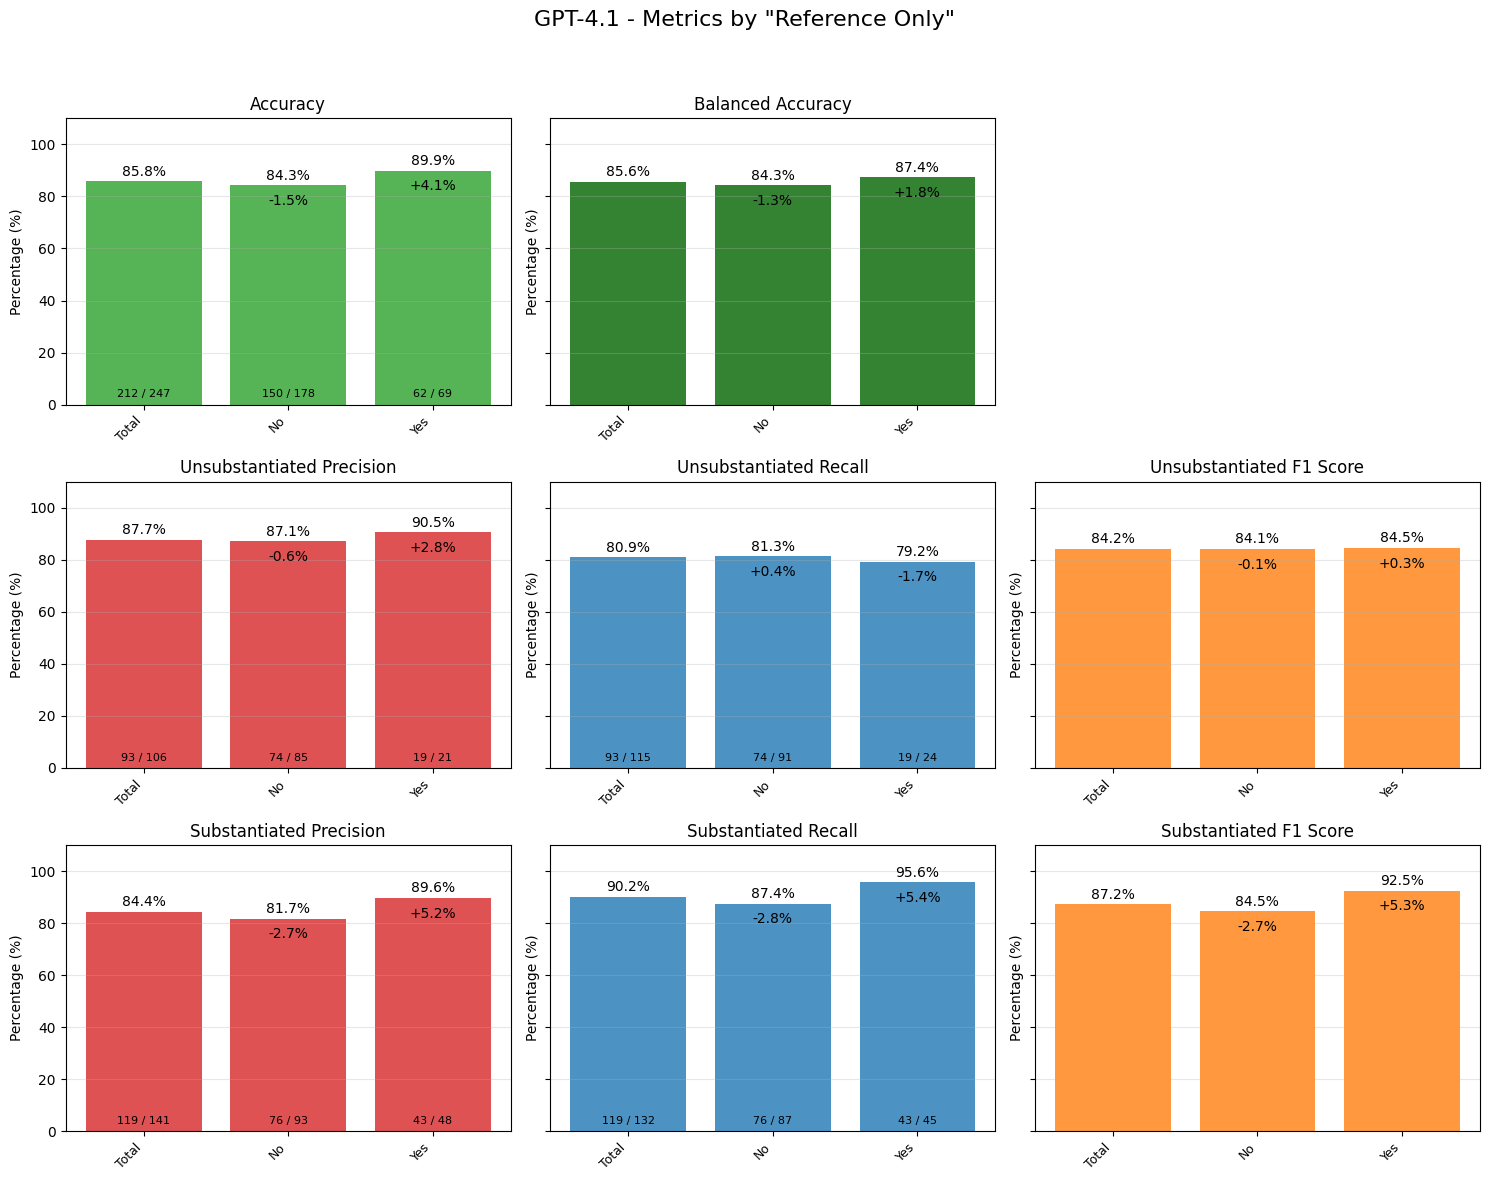

In [15]:
attribute = "Reference Only"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [16]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute)

---- ## Significance tests results for GPT-4.1 on attribute 'Reference Only': ## ----
Fisher's exact test results (per attributevalue when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Yes,1.6533,0.3129,0.8730,0.7769,3.1118,0.2172
No,0.6048,0.3129,1.1455,0.7769,0.3214,0.2172


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,1.3136,0.2517,0.0165,0.8978,0.6967,0.4039


Permutation test results (comparison per metric over 10 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.001400,0.7000,N/A,N/A,N/A,N/A
Accuracy,-0.000500,0.7000,N/A,N/A,N/A,N/A
Precision,N/A,N/A,-0.001900,0.8000,-0.000400,0.4000
Recall,N/A,N/A,-0.005600,0.9000,-0.000400,0.5000
F1 Score,N/A,N/A,-0.002500,0.9000,0.000500,0.3000


### Claim Contains Number or Formula

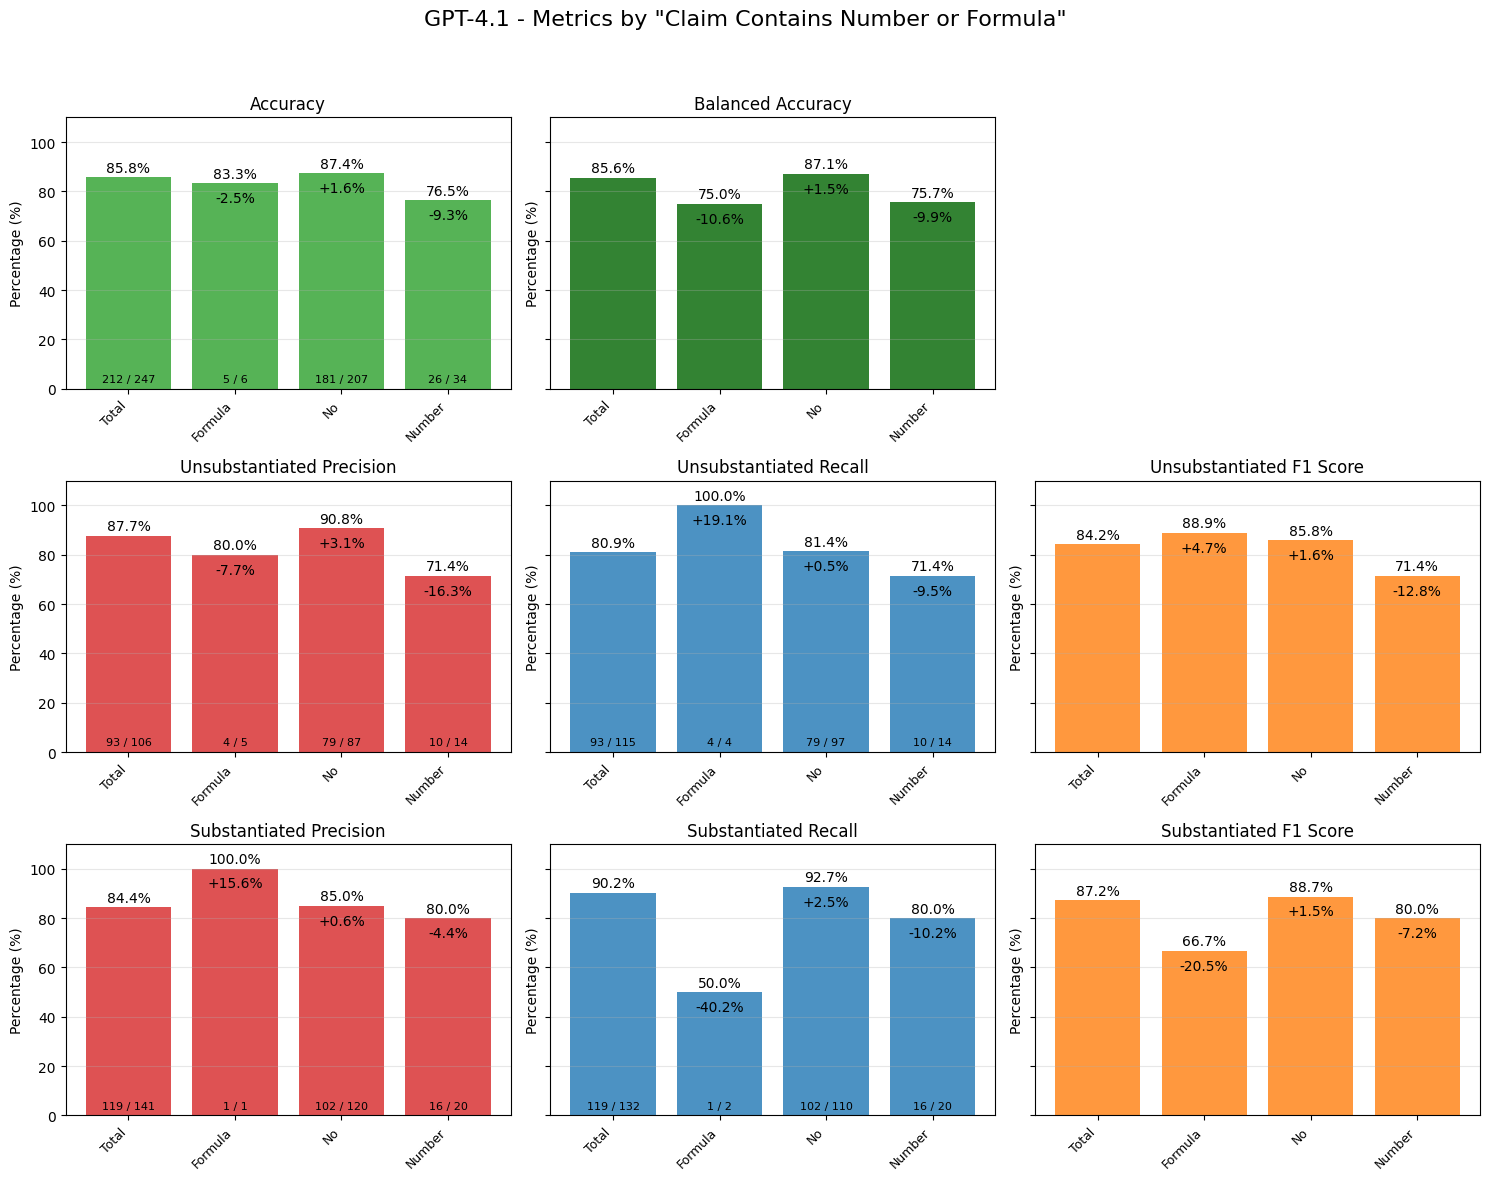

In [17]:
attribute = "Claim Contains Number or Formula"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [18]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model,attribute)

---- ## Significance tests results for GPT-4.1 on attribute 'Claim Contains Number or Formula': ## ----
Fisher's exact test results (per attributevalue when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
No,2.0211,0.1337,1.2540,0.7467,3.7500,0.0421
Number,0.4718,0.1107,0.5422,0.4659,0.3495,0.1105
Formula,0.8213,1.0000,inf,1.0000,0.1017,0.1879


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,0.8352,0.6586,0.8448,0.6555,6.2995,0.0429


Permutation test results (comparison per metric over 10 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.001200,0.5000,N/A,N/A,N/A,N/A
Accuracy,-0.005200,0.9000,N/A,N/A,N/A,N/A
Precision,N/A,N/A,-0.011200,0.5000,-0.015900,0.9000
Recall,N/A,N/A,-0.004700,0.5000,0.026700,0.1000
F1 Score,N/A,N/A,-0.006900,0.7000,0.001400,0.4000


### Amount Citations in Sentence

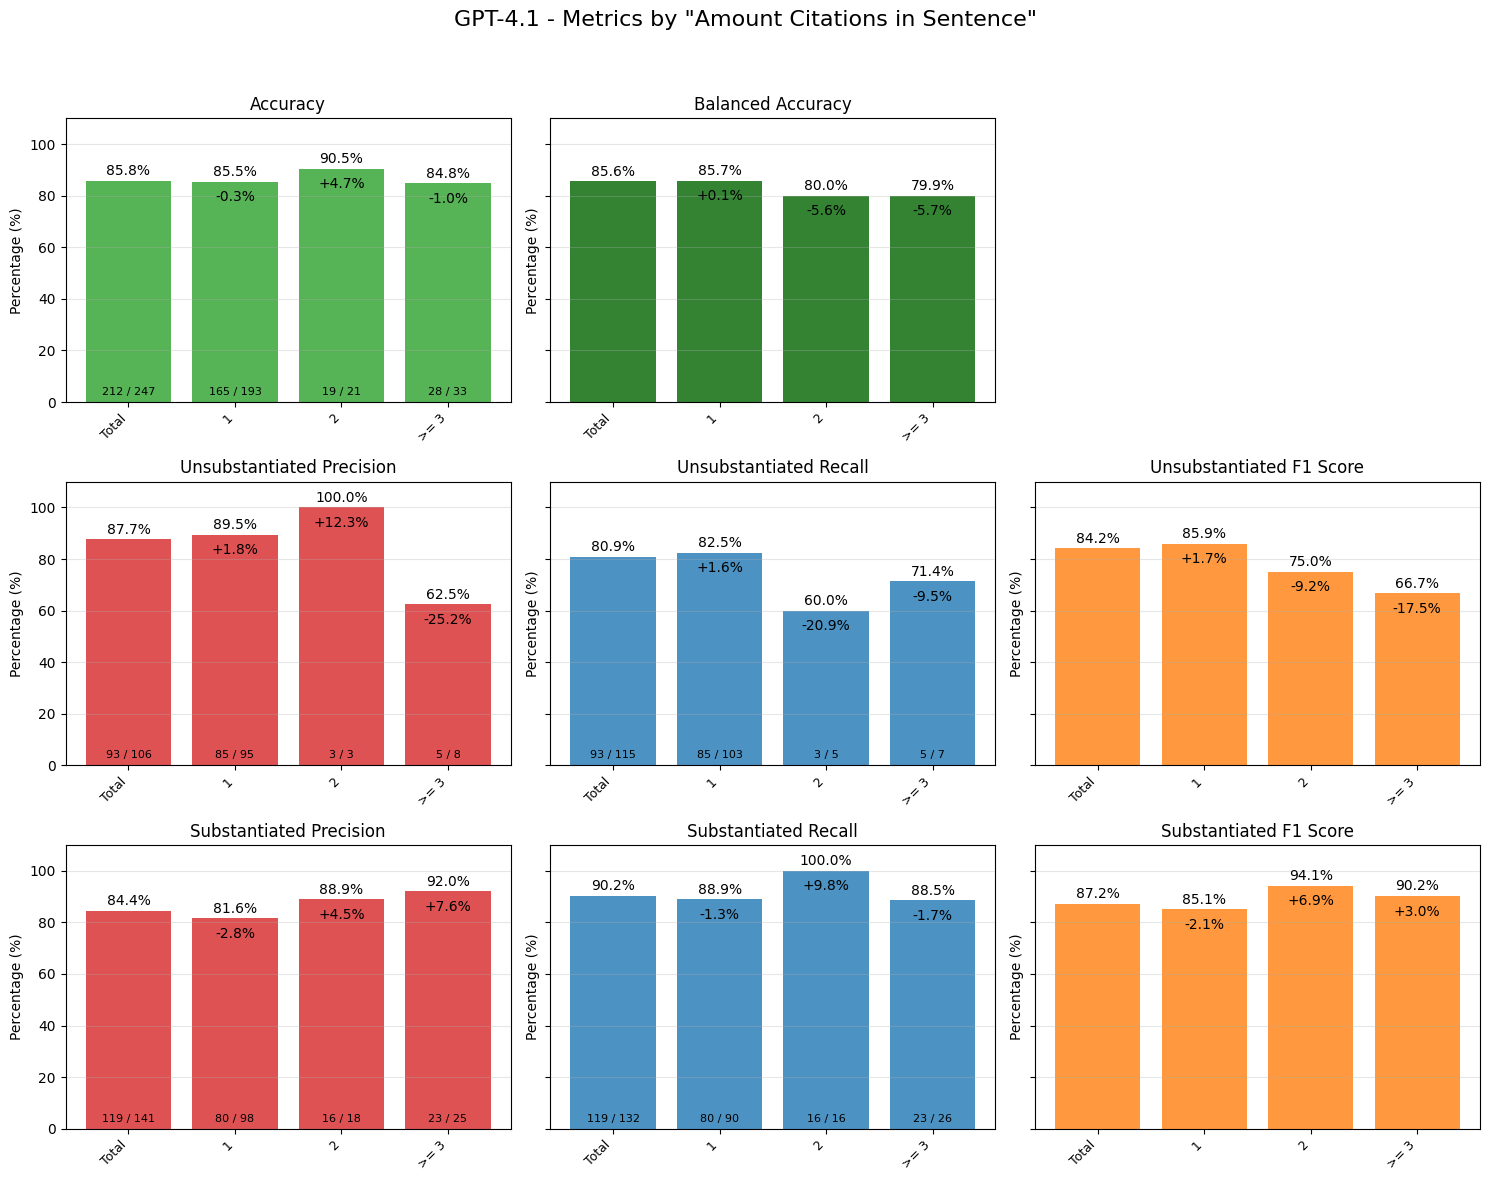

In [19]:
attribute = "Amount Citations in Sentence"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=3)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [20]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute, group_numbers_from=3)

---- ## Significance tests results for GPT-4.1 on attribute 'Amount Citations in Sentence': ## ----
Fisher's exact test results (per attributevalue when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,0.8777,1.0000,2.3611,0.2396,0.6154,0.5499
2,1.6244,0.7472,0.3333,0.2428,inf,0.3656
>= 3,0.9130,0.7929,0.5682,0.6173,0.7986,0.7195


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,1.1424,0.5648,1.3957,0.4976,1.7417,0.4186


Permutation test results (comparison per metric over 10 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,0.000600,0.3000,N/A,N/A,N/A,N/A
Accuracy,-0.000300,0.5000,N/A,N/A,N/A,N/A
Precision,N/A,N/A,0.031300,0.0000,0.003000,0.2000
Recall,N/A,N/A,0.012700,0.1000,-0.002500,0.3000
F1 Score,N/A,N/A,0.001400,0.2000,0.000400,0.2000


### Amount References for Claim

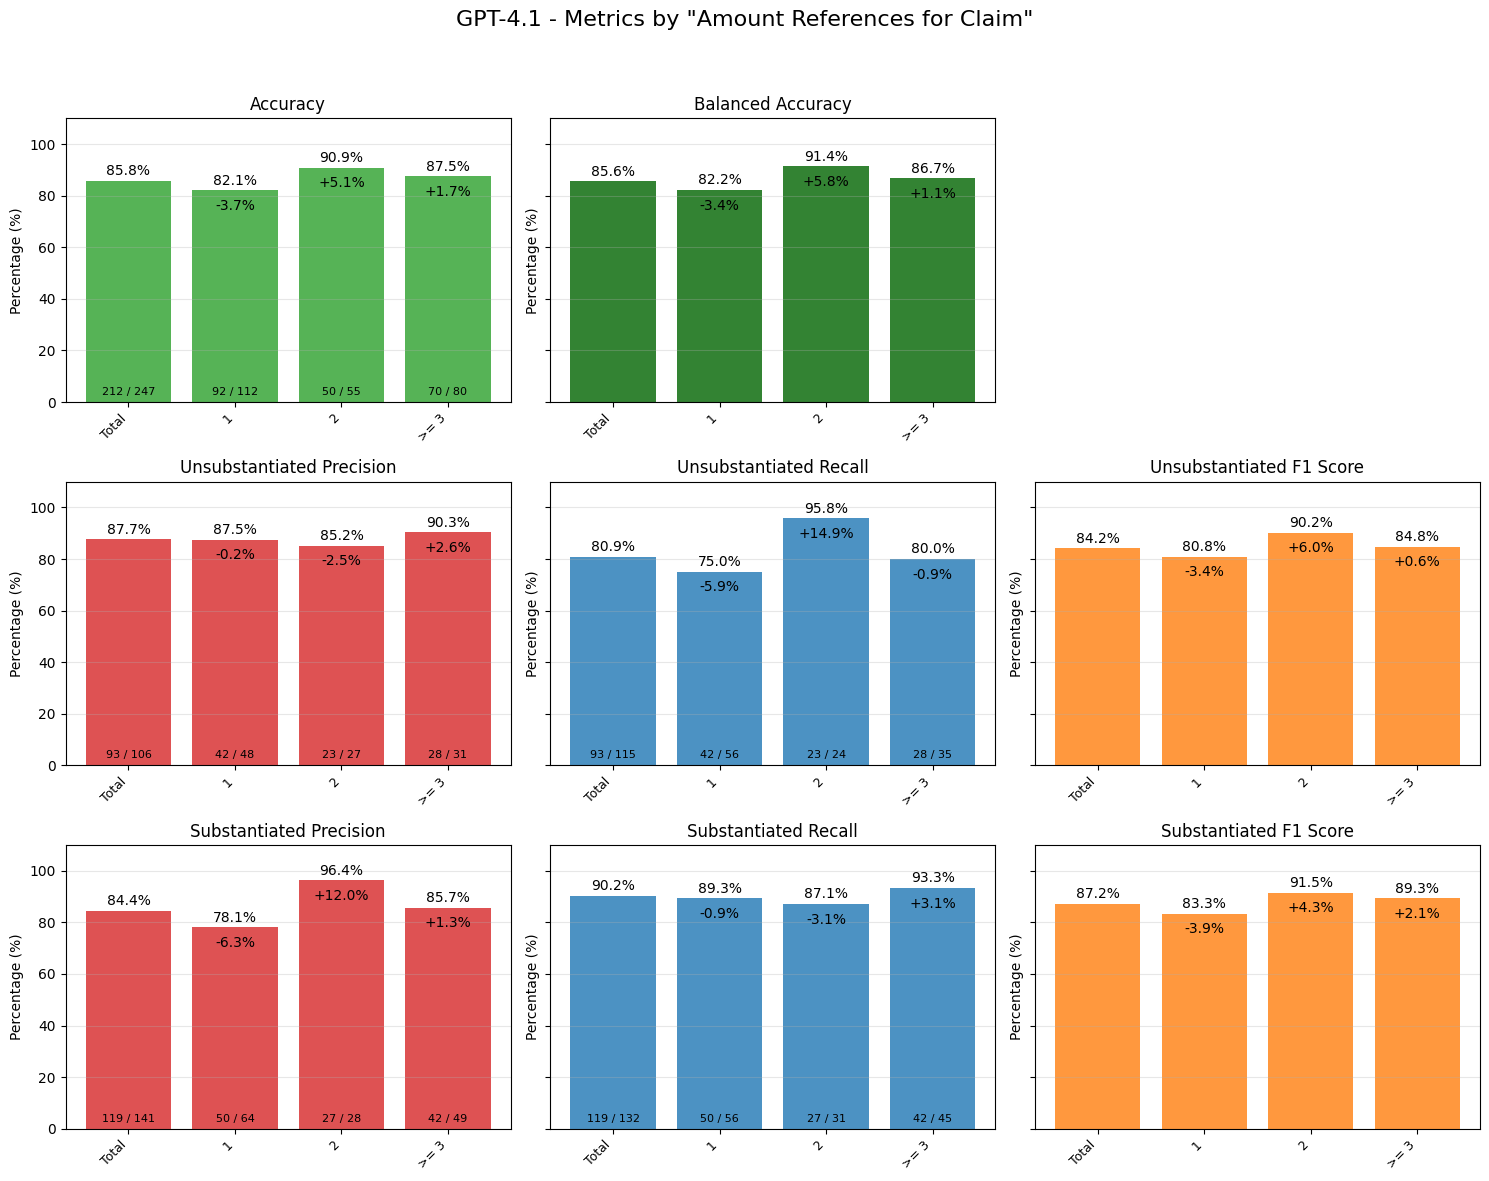

In [21]:
attribute = "Amount References for Claim"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=3)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [22]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute, group_numbers_from=3)

---- ## Significance tests results for GPT-4.1 on attribute 'Amount References for Claim': ## ----
Fisher's exact test results (per attributevalue when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,0.5750,0.1453,0.4706,0.1558,0.8454,0.7764
2,1.8519,0.2763,6.9000,0.0412,0.6603,0.5025
>= 3,1.2324,0.6987,0.9231,1.0000,1.8182,0.5412


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,0.8649,0.6489,3.4225,0.1806,1.2437,0.5369


Permutation test results (comparison per metric over 10 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.001300,0.8000,N/A,N/A,N/A,N/A
Accuracy,-0.001100,0.8000,N/A,N/A,N/A,N/A
Precision,N/A,N/A,-0.001200,0.8000,0.000100,0.5000
Recall,N/A,N/A,-0.001000,0.5000,0.000100,0.4000
F1 Score,N/A,N/A,-0.002100,0.8000,-0.000600,0.8000


### Claim Sentence Structure

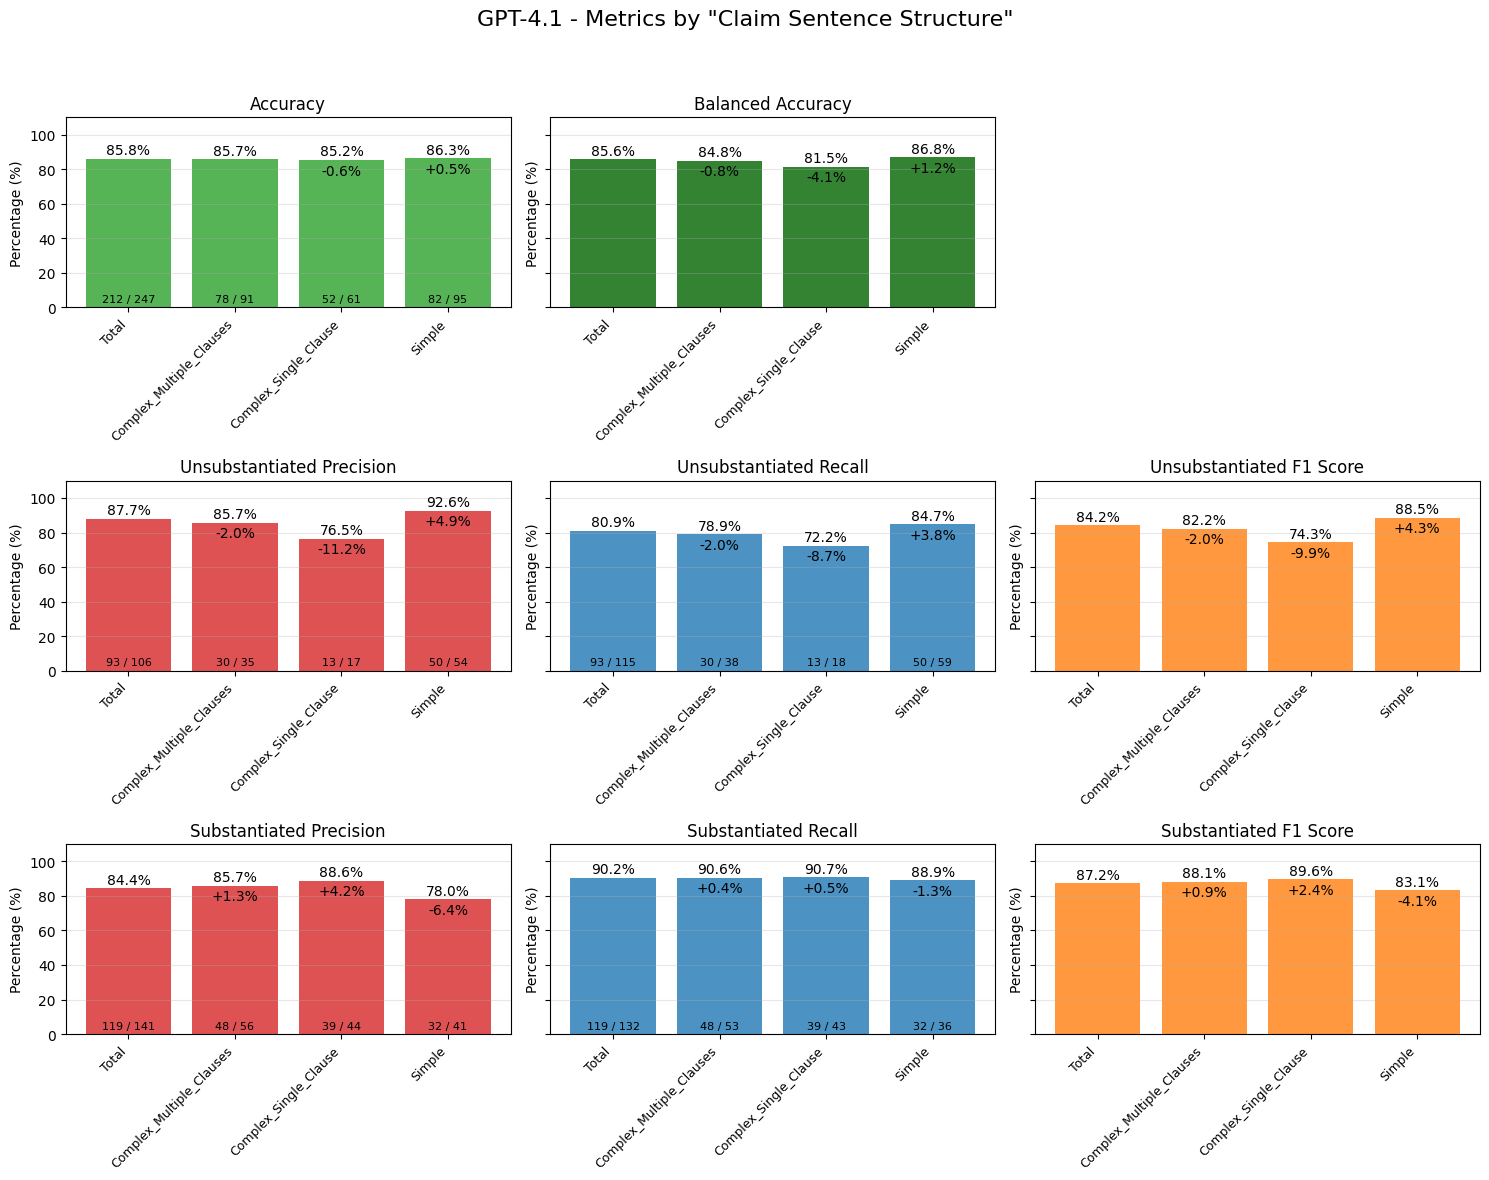

In [23]:
attribute = "Claim Sentence Structure"
results = attribute_predictions_per_model(model_dfs, attribute)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [24]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute)

---- ## Significance tests results for GPT-4.1 on attribute 'Claim Sentence Structure': ## ----
Fisher's exact test results (per attributevalue when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
Simple,1.0675,1.0000,1.6796,0.3453,0.8276,0.7500
Complex_Multiple_Clauses,0.9851,1.0000,0.8333,0.8021,1.0817,1.0000
Complex_Single_Clause,0.9389,0.8356,0.5525,0.3331,1.0969,1.0000


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,0.5858,0.7461,0.2808,0.8690,0.1593,0.9234


Permutation test results (comparison per metric over 10 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.000900,0.9000,N/A,N/A,N/A,N/A
Accuracy,-0.000600,0.8000,N/A,N/A,N/A,N/A
Precision,N/A,N/A,0.003400,0.0000,0.003800,0.0000
Recall,N/A,N/A,-0.002900,1.0000,-0.001000,1.0000
F1 Score,N/A,N/A,0.000100,0.4000,0.001000,0.1000


### Amount Claims to Substantiate

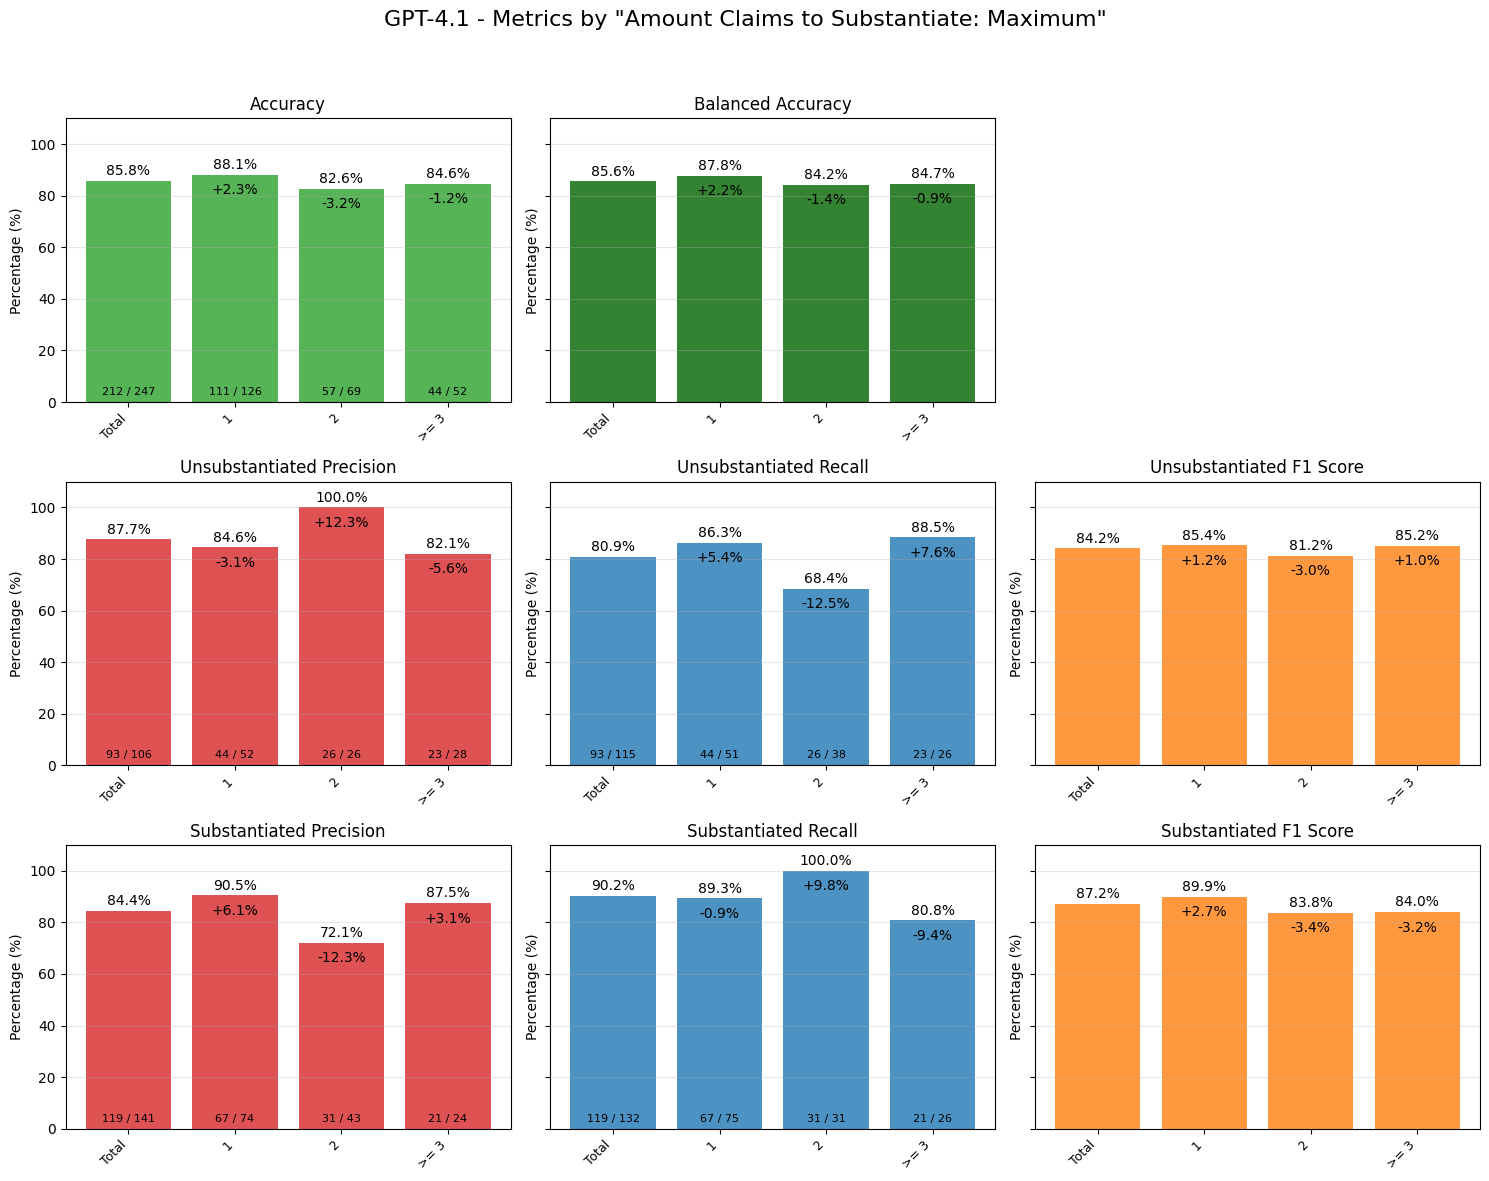

In [25]:
attribute = "Amount Claims to Substantiate: Maximum"
results = attribute_predictions_per_model(model_dfs, attribute, group_numbers_from=3)
show_metrics_by_attribute_values(results, attribute, analyzed_model)

In [26]:
significance_tests_results[attribute] = significance_tests_for_attribute(analyzed_df, analyzed_model, attribute, group_numbers_from=3)

---- ## Significance tests results for GPT-4.1 on attribute 'Amount Claims to Substantiate: Maximum': ## ----
Fisher's exact test results (per attributevalue when compared to rest):


,Total Odds Ratio,Total P-value,Unsubstantiated Odds Ratio,Unsubstantiated P-value,Substantiated Odds Ratio,Substantiated P-value
Attribute Value,,,,,,
1,1.4653,0.3623,1.9242,0.2361,0.8053,0.7764
2,0.7048,0.4166,0.3234,0.0235,inf,0.0379
>= 3,0.8839,0.8233,2.0810,0.3963,0.3429,0.1324


Chi-squared test results (comparison over all attribute values):


,Total Chi2,Total P-value,Unsubstantiated Chi2,Unsubstantiated P-value,Substantiated Chi2,Substantiated P-value
0,2.0015,0.3676,5.1529,0.0760,6.4697,0.0394


Permutation test results (comparison per metric over 10 permutations):


,Total Var Diff,Total P-value,Unsubstantiated Var Diff,Unsubstantiated P-value,Substantiated Var Diff,Substantiated P-value
Metric,,,,,,
Balanced Accuracy,-0.000900,0.7000,N/A,N/A,N/A,N/A
Accuracy,-0.000800,0.5000,N/A,N/A,N/A,N/A
Precision,N/A,N/A,0.004000,0.0000,0.003000,0.1000
Recall,N/A,N/A,0.003400,0.1000,0.004600,0.0000
F1 Score,N/A,N/A,-0.001300,0.9000,-0.000400,0.5000


## Overall Evaluation of Significance Test Results

In [28]:
significance_results = extract_p_values(significance_tests_results)

In [29]:
significance_results

{'Reference Only': {'Fisher Exact': {'Yes': {'Total': 0.3129,
    'Substantiated': 0.2172,
    'Unsubstantiated': 0.7769},
   'No': {'Total': 0.3129,
    'Substantiated': 0.2172,
    'Unsubstantiated': 0.7769}},
  'Chi-Squared': {'Total': 0.2517,
   'Substantiated': 0.4039,
   'Unsubstantiated': 0.8978},
  'Permutation Test': {'Total': {'Accuracy': 0.7, 'Balanced Accuracy': 0.7},
   'Substantiated': {'Precision': 0.4, 'Recall': 0.5, 'F1 Score': 0.3},
   'Unsubstantiated': {'Precision': 0.8, 'Recall': 0.9, 'F1 Score': 0.9}}},
 'Claim Contains Number or Formula': {'Fisher Exact': {'No': {'Total': 0.1337,
    'Substantiated': 0.0421,
    'Unsubstantiated': 0.7467},
   'Number': {'Total': 0.1107,
    'Substantiated': 0.1105,
    'Unsubstantiated': 0.4659},
   'Formula': {'Total': 1.0, 'Substantiated': 0.1879, 'Unsubstantiated': 1.0}},
  'Chi-Squared': {'Total': 0.6586,
   'Substantiated': 0.0429,
   'Unsubstantiated': 0.6555},
  'Permutation Test': {'Total': {'Accuracy': 0.9, 'Balanced Acc

In [ ]:
# TODO: Holm Method for multiple testing correction - only on chi-squared and permutation test p-values (because Fisher's exact test is per attribute value and not one overall test, so different for each significance test)

# TODO: Maybe Bonferroni Correction for Fisher's Exact Test p-values?